In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from random import choice
import random
import networkx as nx
import os
import collections
from pandas.io.json import json_normalize

In [2]:
# SET CHANNEL PREFERENCES
connectedness_percentile = 99
num_channels_to_make = 3
channel_capacity_sats = 20000

In [38]:
# GET DATA
lightning_dir = "~/lightning/cli/"
save_dir = "> /Users/dariuscognac/Documents/GitHub/Lightning-Network-Topological-Analysis/"
listnodes = lightning_dir + "lightning-cli listnodes" + save_dir + "list_of_nodes.json"
listchannels = lightning_dir + "lightning-cli listchannels" + save_dir + "list_of_channels.json"

# os.system(listnodes);
# os.system(listchannels);


# LOAD AND FORMAT DATA
nodes_temp = pd.read_json('list_of_nodes.json')
nodes_table = json_normalize(nodes_temp['nodes'])

channels_temp = pd.read_json('list_of_channels.json')
channels_table = json_normalize(channels_temp['channels'])


# MAKE GRAPH
G = nx.Graph()
G.add_nodes_from(nodes_table['nodeid'])
edges_list = [(channels_table['source'][i], channels_table['destination'][i]) for i in range(len(channels_table))]
G.add_edges_from(edges_list)

print('Number of nodes = ' + str(len(G.nodes())))
print('Number of edges (payment channels) = ' + str(len(G.edges())))
print('\n\n')

# Get just the main graph
def get_main_subgraph(G):
    all_sub_G = list(nx.connected_component_subgraphs(G))
    largest_sg = 0
    for i, sg in enumerate(all_sub_G):
        if sg.number_of_nodes() > largest_sg:
            largest_sg = sg.number_of_nodes()
            main_G = sg
    return main_G


# Define find_nodes_with_highest_deg_cent()
def find_nodes_high_percentile_deg_cent(G, connectedness_percentile):
    # Compute the degree centrality of G: deg_cent      
    deg_cent = nx.degree_centrality(G)
    # Compute the X percentile of degree centrality
    dc = list(deg_cent.values())
    high_percentile_dc = np.percentile(dc, connectedness_percentile)
    nodes = set()
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
        # Check if the current value has the maximum degree centrality
        if v > high_percentile_dc:
            # Add the current node to the set of nodes
            nodes.add(k)
    return nodes


def plot_deg_hist(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    ax.set_yscale('log')
    ax.set_xscale('log')

    plt.show()
    

def plot_eig_hist(G):
    degree_sequence = sorted([d for n, d in nx.eigenvector_centrality(G)], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Eigenvalue Centrality Histogram")
    plt.ylabel("Count")
    plt.xlabel("Eigenvalue Centrality")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    ax.set_yscale('log')
    ax.set_xscale('log')

    plt.show()

Number of nodes = 4117
Number of edges (payment channels) = 4917





In [40]:
plot_eig_hist(main_G)

ValueError: too many values to unpack (expected 2)

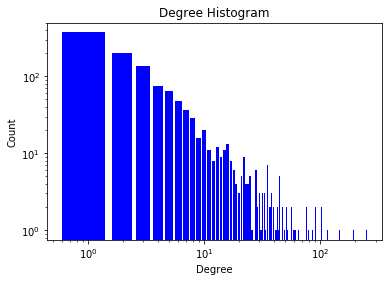

In [8]:
plot_deg_hist(get_main_subgraph(G))

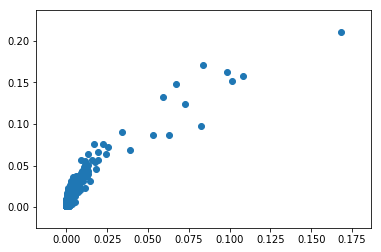

In [35]:
# Compute the degree centrality of G: deg_cent      
deg = nx.degree(G)    
deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)

eig_cen = nx.eigenvector_centrality(G)

plt.scatter(x = list(bet_cen.values()), y = list(deg_cen.values()));

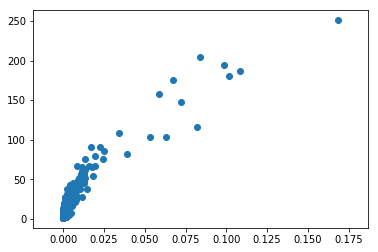

In [34]:
plt.scatter(x = list(bet_cen.values()), y = list(degrees.values()));

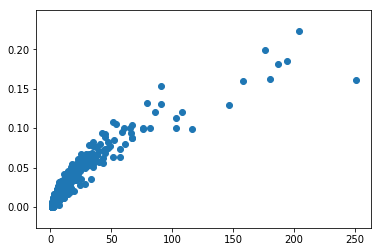

In [37]:
plt.scatter(x = list(degrees.values()), y = list(eig_cen.values()));

In [15]:
degree_sequence = sorted([d for n, d in main_G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

In [32]:
degrees = {node:val for (node, val) in main_G.degree()}